In [1]:
import os
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from collections import Counter
import json

In [2]:
# Look at NSFW detection dataset
nsfw_path = Path('datasets/raw/nsfw_detection')

print("NSFW Dataset Structure:")
print("="*60)

# Find all subdirectories
subdirs = [d for d in nsfw_path.iterdir() if d.is_dir()]
print(f"\nSubdirectories: {[d.name for d in subdirs]}")

# Count images in each subdirectory
for subdir in subdirs:
    images = list(subdir.glob('*.jpg')) + list(subdir.glob('*.png')) + list(subdir.glob('*.jpeg'))
    print(f"  {subdir.name}: {len(images)} images")

# Or if images are flat in the directory
all_images = list(nsfw_path.glob('*.jpg')) + list(nsfw_path.glob('*.png')) + list(nsfw_path.glob('*.jpeg'))
if all_images:
    print(f"\nFlat structure: {len(all_images)} images in root")

# Check for CSV metadata
csv_files = list(nsfw_path.glob('*.csv'))
if csv_files:
    print(f"\nMetadata files: {[f.name for f in csv_files]}")
    for csv_file in csv_files:
        df = pd.read_csv(csv_file)
        print(f"\n{csv_file.name}:")
        print(f"  Shape: {df.shape}")
        print(f"  Columns: {list(df.columns)}")
        print(f"\nFirst few rows:")
        print(df.head())

NSFW Dataset Structure:

Subdirectories: ['out']
  out: 0 images


In [3]:
# Look at violence/safe dataset
violence_path = Path('datasets/raw/violence_safe')

print("\n" + "="*60)
print("Violence/Safe Dataset Structure:")
print("="*60)

subdirs = [d for d in violence_path.iterdir() if d.is_dir()]
print(f"\nSubdirectories: {[d.name for d in subdirs]}")

for subdir in subdirs:
    images = list(subdir.glob('*.jpg')) + list(subdir.glob('*.png')) + list(subdir.glob('*.jpeg'))
    print(f"  {subdir.name}: {len(images)} images")

# Check for CSV
csv_files = list(violence_path.glob('*.csv'))
if csv_files:
    print(f"\nMetadata files: {[f.name for f in csv_files]}")
    for csv_file in csv_files:
        df = pd.read_csv(csv_file)
        print(f"\n{csv_file.name}:")
        print(f"  Columns: {list(df.columns)}")


Violence/Safe Dataset Structure:

Subdirectories: ['Graphically Violent Images', 'Graphically Safe Images']
  Graphically Violent Images: 65 images
  Graphically Safe Images: 1096 images


Loading NSFW samples...
Loading violence samples...
Loading safe samples...


FileNotFoundError: [Errno 2] No such file or directory: 'results/dataset_samples.png'

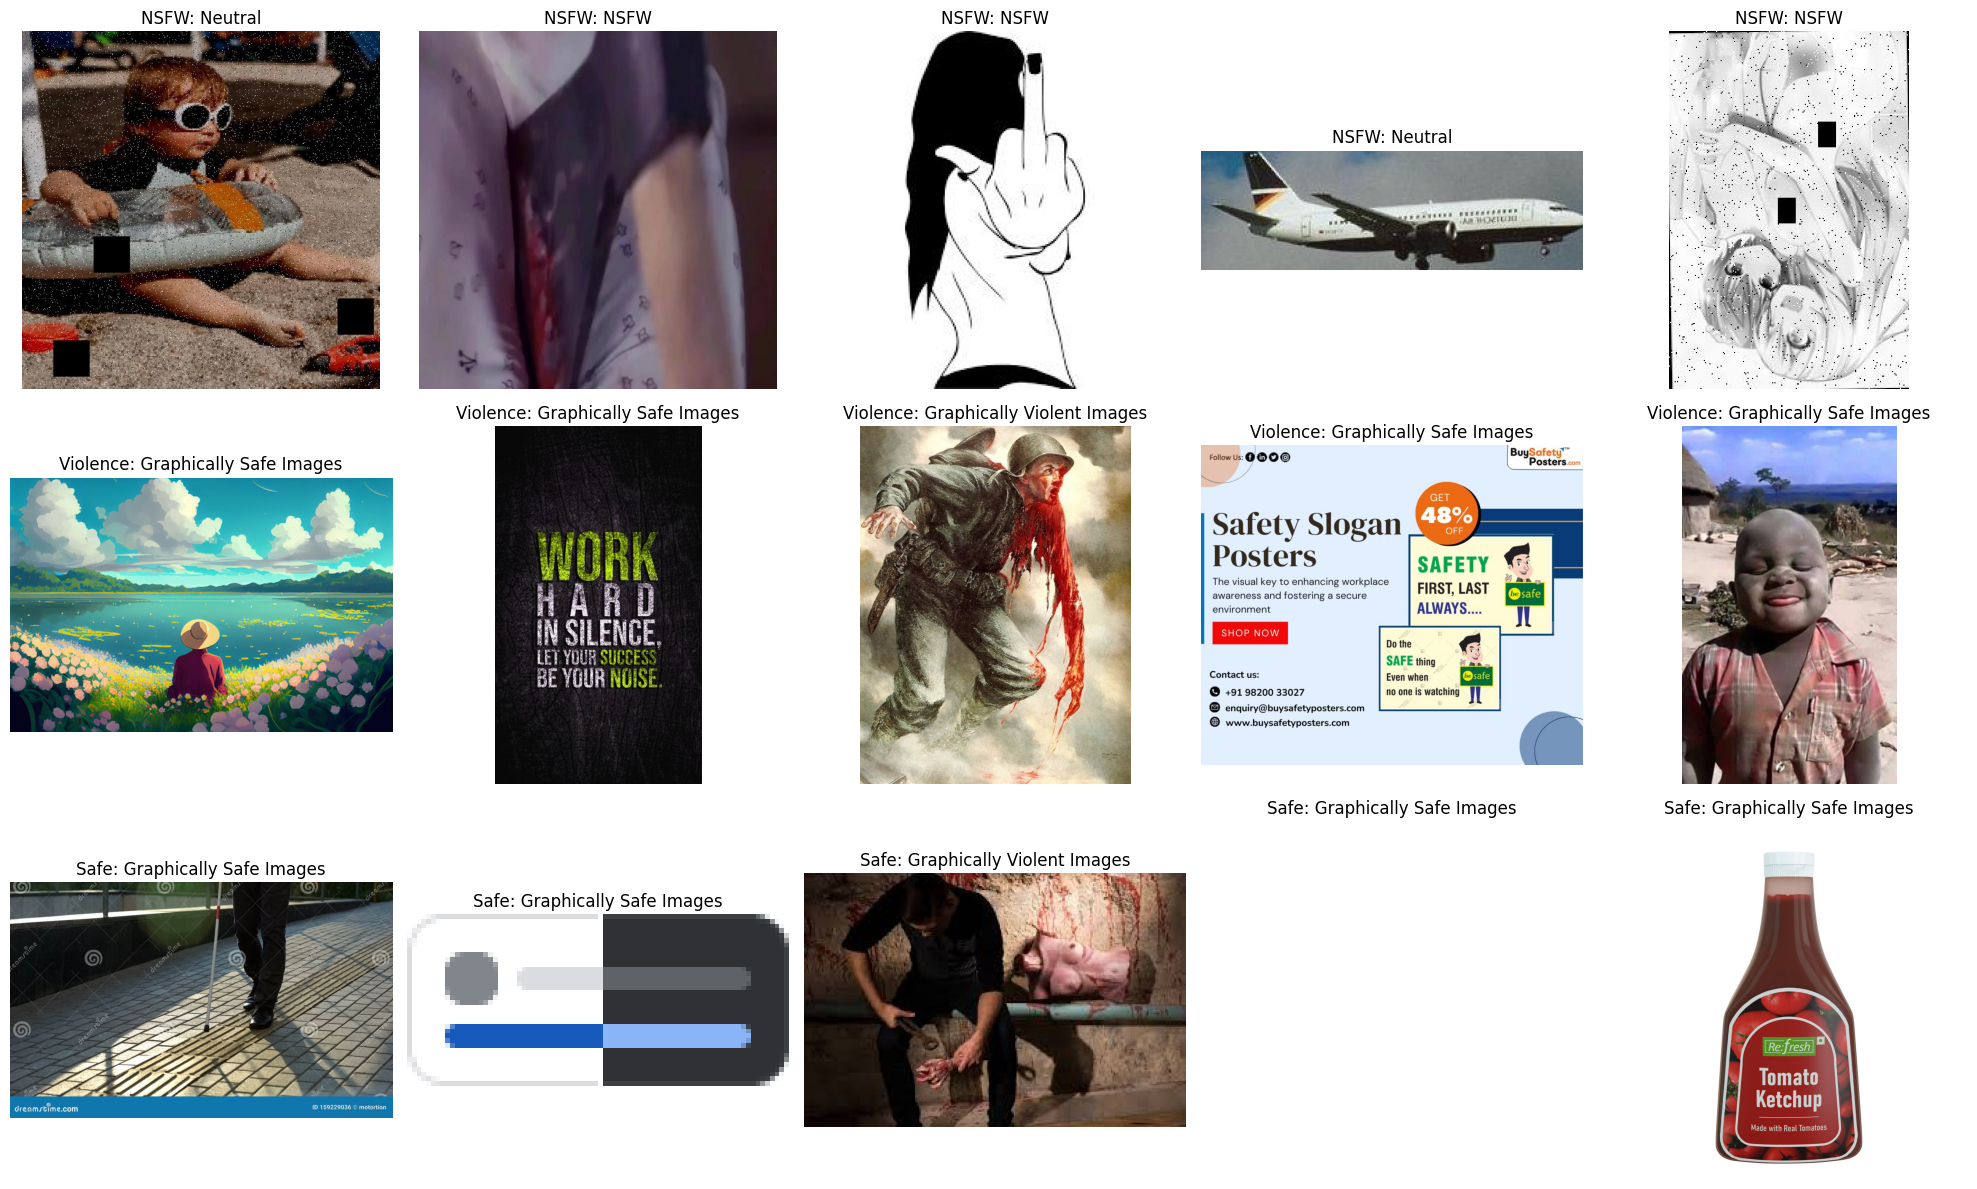

In [4]:
# Visualize samples from each category
fig, axes = plt.subplots(3, 5, figsize=(20, 12))

# Function to load random images from a directory
def get_random_images(path, n=5):
    all_images = list(path.rglob('*.jpg')) + list(path.rglob('*.png')) + list(path.rglob('*.jpeg'))
    if len(all_images) > n:
        return np.random.choice(all_images, n, replace=False)
    return all_images[:n]

# Row 1: NSFW samples (be careful - might actually be NSFW)
print("Loading NSFW samples...")
nsfw_samples = get_random_images(nsfw_path, 5)
for idx, (ax, img_path) in enumerate(zip(axes[0], nsfw_samples)):
    try:
        img = Image.open(img_path)
        ax.imshow(img)
        ax.set_title(f"NSFW: {img_path.parent.name}")
        ax.axis('off')
    except Exception as e:
        ax.text(0.5, 0.5, f'Error: {e}', ha='center')
        ax.axis('off')

# Row 2: Violence samples
print("Loading violence samples...")
violence_samples = get_random_images(violence_path, 5)
for idx, (ax, img_path) in enumerate(zip(axes[1], violence_samples)):
    try:
        img = Image.open(img_path)
        ax.imshow(img)
        ax.set_title(f"Violence: {img_path.parent.name}")
        ax.axis('off')
    except Exception as e:
        ax.text(0.5, 0.5, f'Error: {e}', ha='center')
        ax.axis('off')

# Row 3: Safe samples (from violence dataset safe folder)
print("Loading safe samples...")
safe_path = violence_path / 'safe' if (violence_path / 'safe').exists() else violence_path
safe_samples = get_random_images(safe_path, 5)
for idx, (ax, img_path) in enumerate(zip(axes[2], safe_samples)):
    try:
        img = Image.open(img_path)
        ax.imshow(img)
        ax.set_title(f"Safe: {img_path.parent.name}")
        ax.axis('off')
    except Exception as e:
        ax.text(0.5, 0.5, f'Error: {e}', ha='center')
        ax.axis('off')

plt.tight_layout()
plt.savefig('results/dataset_samples.png', dpi=150, bbox_inches='tight')
plt.show()

print("✅ Saved visualization to results/dataset_samples.png")